<a href="https://colab.research.google.com/github/parsabarghi/Costumer-Segmentation/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Reading Data

In [ ]:
df = pd.read_csv('./Mall_Customers.csv')

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


# Analysis

## **Univariate**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

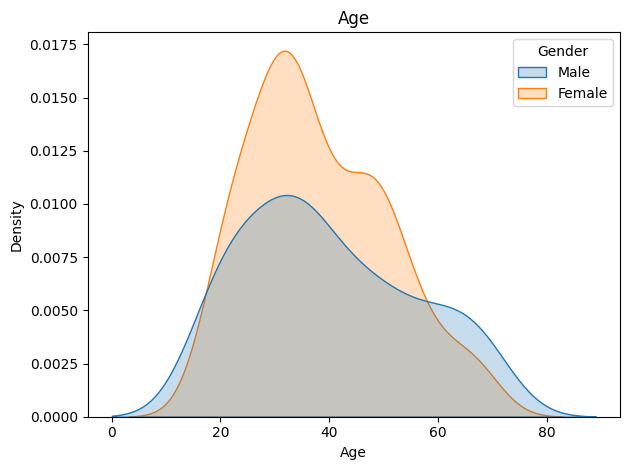

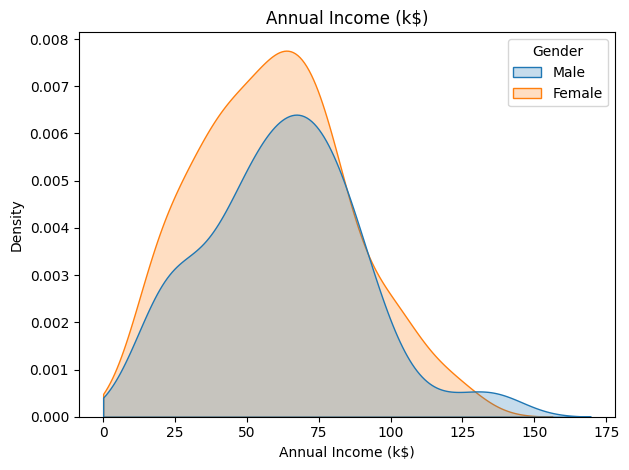

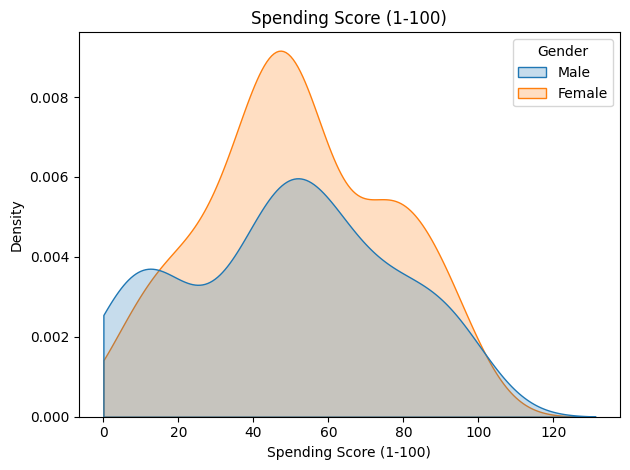

In [ ]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
df_long = pd.melt(df, id_vars='Gender', value_vars=columns, var_name='variable', value_name='value')
for i in columns:
  plt.figure(layout='tight')
  sns.kdeplot(df_long, x=df[i], hue=df['Gender'], fill=True, clip=(0, None))
  plt.title(i)
plt.show()

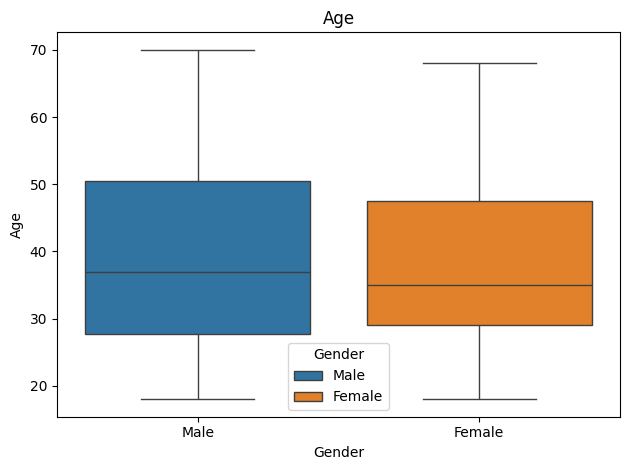

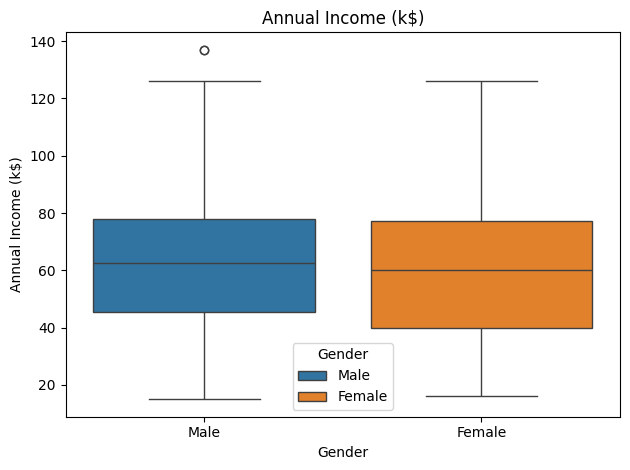

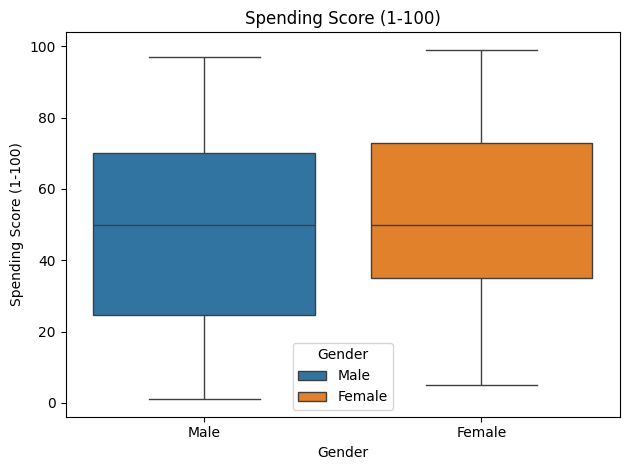

In [ ]:
for i in columns:
  plt.figure(layout='tight')
  sns.boxplot(df_long, x='Gender', y=df[i], hue=df['Gender'])
  plt.title(i)
plt.show()

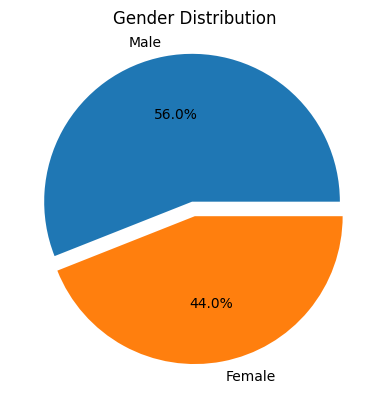

In [ ]:
explode = (0.1, 0.0)
plt.pie(df['Gender'].value_counts(), explode= explode , autopct='%1.1f%%', labels=df['Gender'].unique())
plt.title('Gender Distribution')
plt.show()

## **Bivariate**

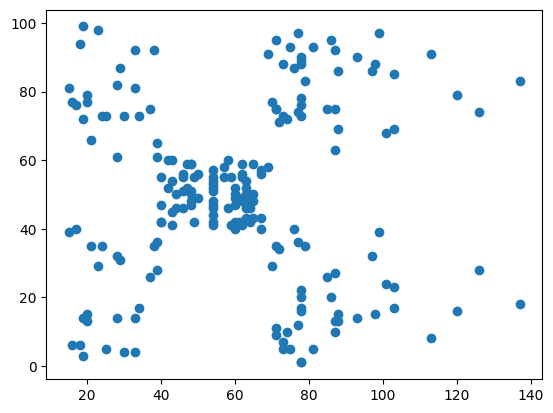

In [ ]:
plt.figure()
plt.scatter(data=df, x='Annual Income (k$)', y='Spending Score (1-100)')
plt.show()

### Drop Useless Data (Customer Id)

In [ ]:
df = df.drop(['CustomerID'], axis=1)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


<Figure size 1000x800 with 0 Axes>

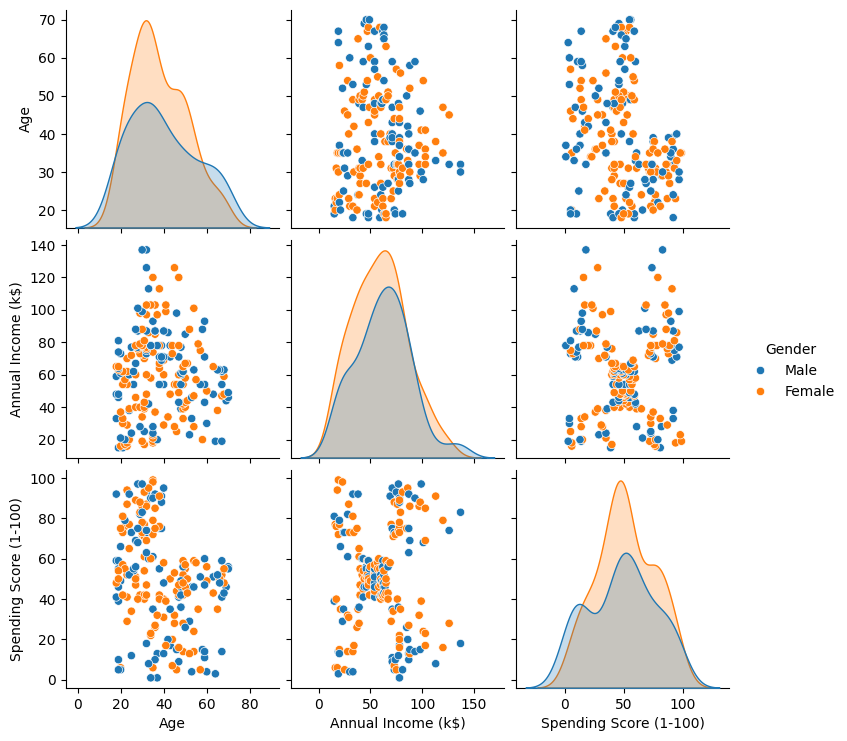

In [ ]:
plt.figure(figsize=(10,8))
sns.pairplot(data=df, hue='Gender')
plt.show()

In [ ]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [ ]:
df.groupby(['Gender'])['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


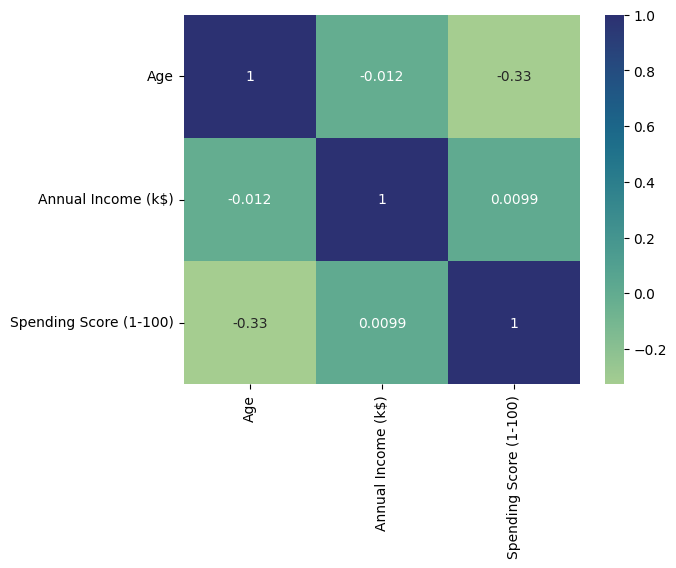

In [ ]:
plt.figure()
sns.heatmap(df.corr(), annot=True, cmap='crest')
plt.show()

# Encoding

In [ ]:
df = pd.get_dummies(df, drop_first=True)

In [ ]:
df

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,0
196,45,126,28,0
197,32,126,74,1
198,32,137,18,1


# Normalize

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

# Modeling

## **Univariate**

In [ ]:
from sklearn.cluster import KMeans

model_1 = KMeans(n_clusters=3)
model_1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [ ]:
model_1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [ ]:
df['model income'] = model_1.labels_
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,model income,income-spending,spending-income
0,19,15,39,1,1,3,0
1,21,15,81,1,1,4,3
2,20,16,6,0,1,3,0
3,23,16,77,0,1,4,3
4,31,17,40,0,1,3,0


In [ ]:
df['model income'].value_counts()

0    90
1    74
2    36
Name: model income, dtype: int64

In [ ]:
model_1.inertia_

23517.33093093093

In [ ]:
inertia_score = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(df[['Annual Income (k$)']])
  inertia_score.append(kmeans.inertia_)

In [ ]:
inertia_score

[137277.28000000006,
 48660.888888888876,
 23528.15217391306,
 13278.112713472483,
 8481.49619047619,
 5050.9047619047615,
 3931.9880952380945,
 2836.3399877899874,
 2298.4433749257278,
 1734.1677489177496]

Text(0.5, 1.0, 'Elbow Method')

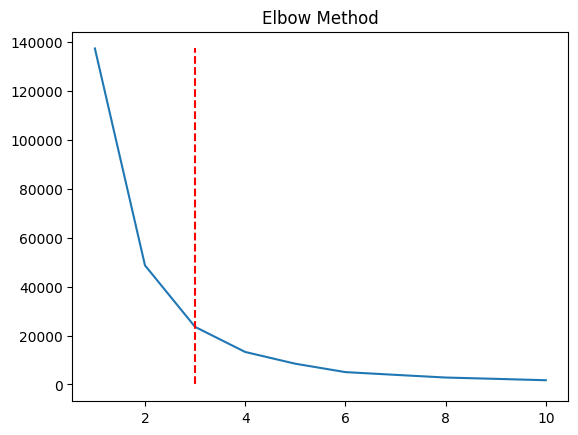

In [ ]:
plt.plot(range(1, 11), inertia_score)
plt.vlines(x = 3, ymin = 0, ymax = max(inertia_score),
           colors = 'red',
           label = 'vline_multiple - full height',
           linestyles='dashed')
plt.title("Elbow Method")

## Bivariate

In [ ]:
df.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male',
       'model income'],
      dtype='object')

In [ ]:
model_2 = KMeans(n_clusters=5)
model_2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])

KMeans(n_clusters=5)

In [ ]:
df['spending-income'] = model_2.labels_
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,model income,income-spending,spending-income
0,19,15,39,1,0,3,0
1,21,15,81,1,0,4,3
2,20,16,6,0,0,3,0
3,23,16,77,0,0,4,3
4,31,17,40,0,0,3,0


In [ ]:
inertia_score_2 = []
for i in range(1, 11):
  kmeans2 = KMeans(n_clusters=i)
  kmeans2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
  inertia_score_2.append(kmeans2.inertia_)

Text(0.5, 1.0, 'Elbow Method')

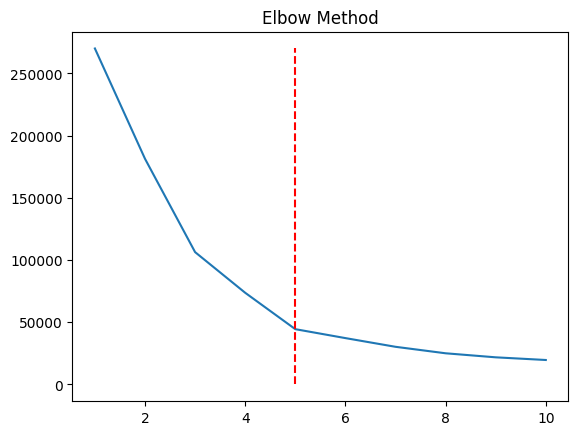

In [ ]:
plt.plot(range(1, 11), inertia_score_2)
plt.vlines(x = 5, ymin = 0, ymax = max(inertia_score_2),
           colors = 'red',
           label = 'vline_multiple - full height',
           linestyles='dashed')
plt.title("Elbow Method")

In [ ]:
centers = pd.DataFrame(model_2.cluster_centers_)
centers.columns = ['x', 'y']

In [ ]:
centers

,x,y
0,26.304348,20.913043
1,55.296296,49.518519
2,88.200000,17.114286
3,25.727273,79.363636
4,86.538462,82.128205


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

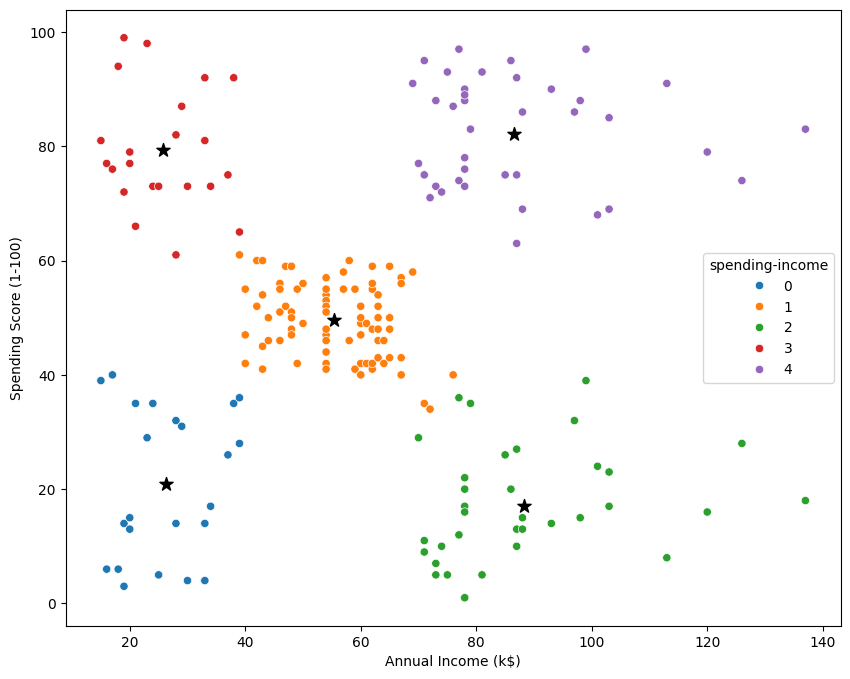

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(x = centers['x'], y=centers['y'], s=100, c='black', marker='*')
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['spending-income'], palette='tab10')

In [ ]:
df.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male',
       'model income', 'spending-income'],
      dtype='object')

In [ ]:
df.groupby('model income')['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male'].mean()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
model income,,,,
0,38.722222,67.088889,50.000000,0.455556
1,39.500000,33.486486,50.229730,0.391892
2,37.833333,99.888889,50.638889,0.500000


In [ ]:
df.groupby('spending-income')['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male'].mean()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
spending-income,,,,
0,45.217391,26.304348,20.913043,0.391304
1,42.716049,55.296296,49.518519,0.407407
2,41.114286,88.200000,17.114286,0.542857
3,25.272727,25.727273,79.363636,0.409091
4,32.692308,86.538462,82.128205,0.461538


In [ ]:
df.crosstab(df['spending-income'], df['Gender_Male'], nor)